Задание 1: визуализация деревьев 

Срок сдачи: до 7 апреля включительно. 

Дерево задаётся как ориентированный граф, все рёбра которого ориентированы от корня к листьям. 

Нужно реализовать укладку с помощью HV-подхода или алгоритма Layered-Tree-Draw. Можно выбрать и другой алгоритм, но требуется указать описание или ссылку на описание при сдаче проекта. 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
bin_tree_xml="./bin-tree.xml"
tree = nx.read_graphml(bin_tree_xml)

In [72]:
class LTDraw:
    def __init__(self, tree):
        self.coords = {}
        self.tree = tree
        self.last_right = 0
        self.rank = 0
        
    def get_children(self, node):
        return list(self.tree.neighbors(node))
    
    def find_root(self):
        for node, in_degree in self.tree.in_degree():
            if in_degree == 0:
                return node

    def build(self, node, y):
        children = self.get_children(node)
        
        if len(children) == 0:
            self.coords[node] = (self.rank, y)
            
        elif len(children) == 1:
            self.build(children[0], y+1)
            self.rank += 1
            self.coords[node] = (self.rank, y)
            
        else:
            self.build(children[0], y+1)
            self.rank += 1
            self.coords[node] = (self.rank, y)
            self.rank += 1
            self.build(children[1], y+1)
            
    def draw(self):
        print("All coordinate moves done")
        root = self.find_root()
        self.build(root, 0)
        
        fig = plt.figure(figsize=(15, 25))
        nx.draw(self.tree, self.coords, with_labels=True, arrowsize=5)
        fig.savefig('result.svg')
        print(self.coords)


All coordinate moves done
{'n4': (0, 4), 'n3': (1, 3), 'n2': (2, 2), 'n1': (3, 1), 'n7': (4, 4), 'n6': (5, 3), 'n5': (6, 2), 'n0': (7, 0), 'n13': (8, 6), 'n12': (9, 5), 'n18': (10, 10), 'n17': (11, 9), 'n16': (12, 8), 'n15': (13, 7), 'n14': (14, 6), 'n11': (15, 4), 'n20': (16, 6), 'n19': (17, 5), 'n21': (18, 6), 'n10': (19, 3), 'n9': (20, 2), 'n26': (21, 7), 'n25': (22, 6), 'n24': (23, 5), 'n27': (24, 6), 'n23': (25, 4), 'n31': (26, 8), 'n30': (27, 7), 'n29': (28, 6), 'n34': (29, 9), 'n33': (30, 8), 'n35': (31, 9), 'n32': (32, 7), 'n37': (33, 9), 'n36': (34, 8), 'n28': (35, 5), 'n39': (36, 7), 'n38': (37, 6), 'n22': (38, 3), 'n8': (39, 1), 'n41': (40, 3), 'n40': (41, 2)}


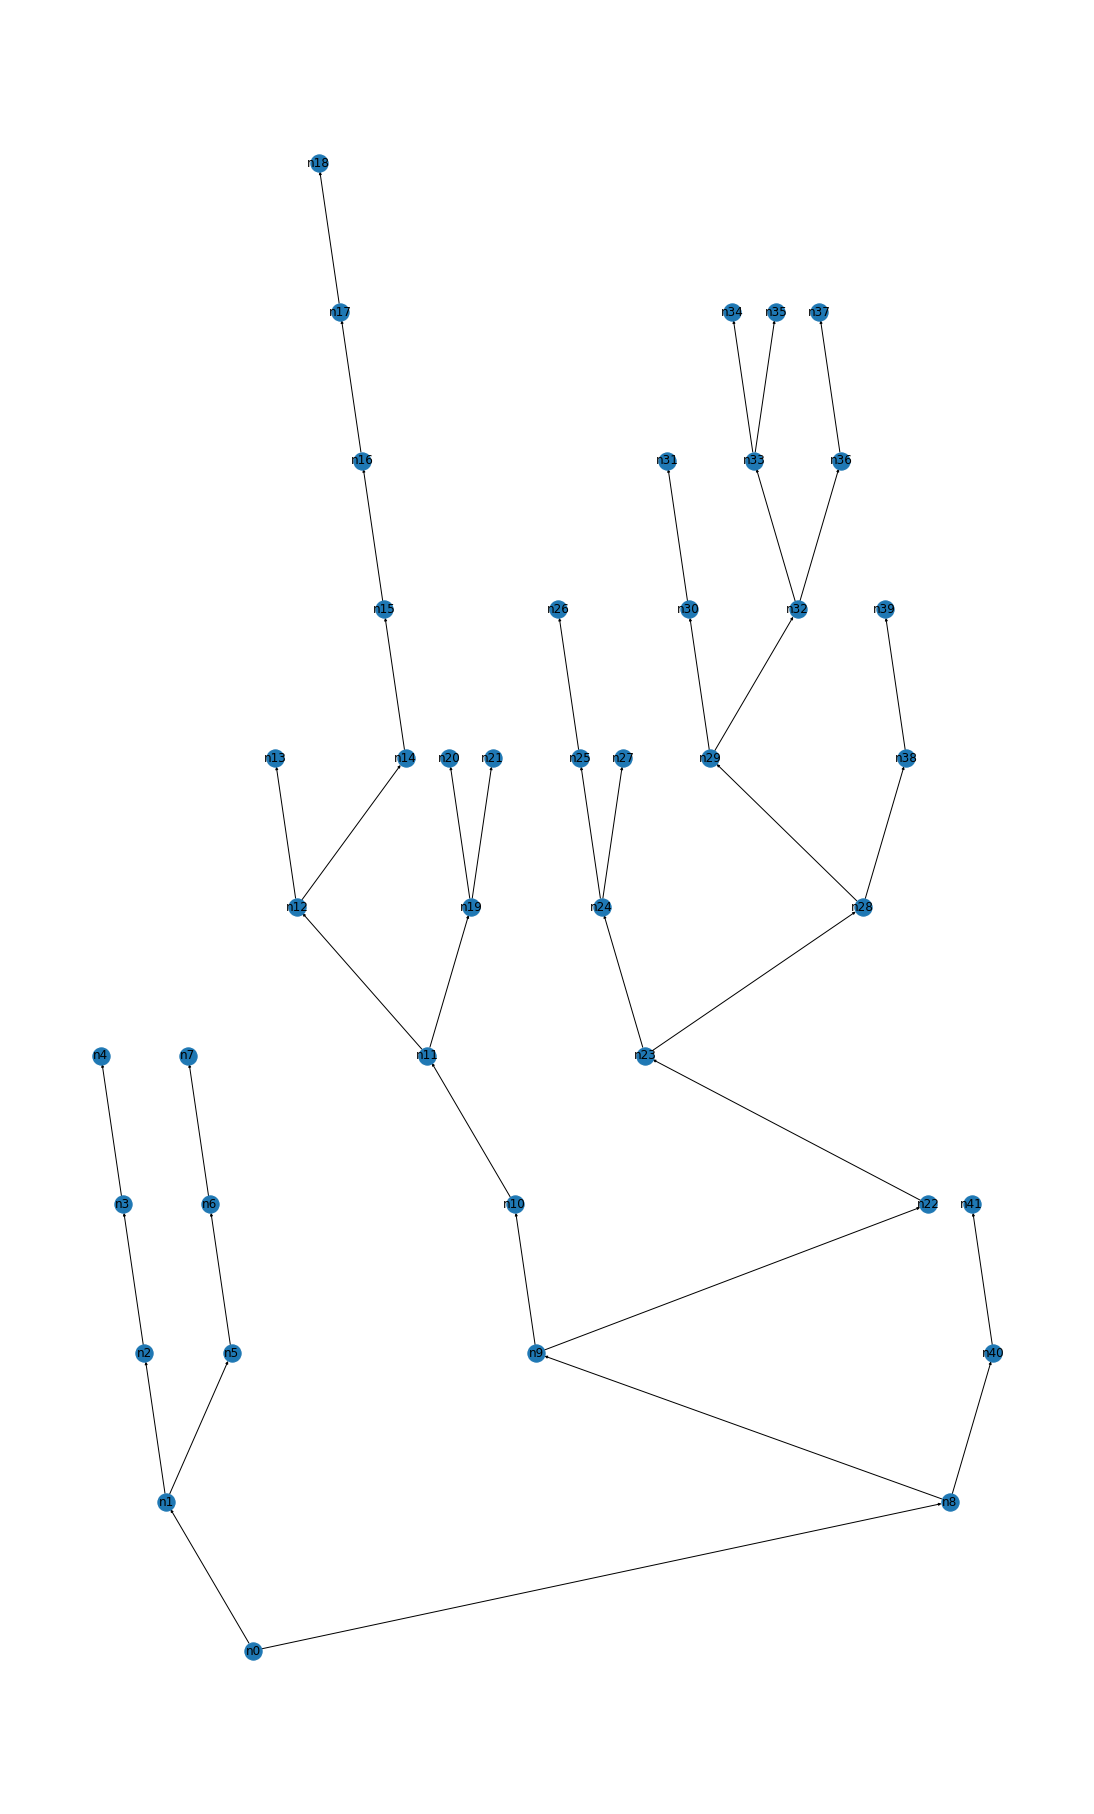

In [73]:
m = LTDraw(tree)
m.draw()

In [49]:
class HVTree:
    def __init__(self, filename):
        self.positions = {}
        self.tree = nx.read_graphml(filename)

        self.tree_dict = {}
        for node in self.tree.nodes:
            self.tree_dict[node] = list(self.tree.neighbors(node))
    
    def hv_tree(self, root, depth, width):
        self.positions[root] = (width, depth)
        children = self.tree_dict[root]
        if len(children) == 0:
            return 0
        elif len(children) == 1:
            return self.hv_tree(children[0], depth, width+1)
        else:
            depth_right = self.hv_tree(children[0], depth, width+1)
            depth_down = self.hv_tree(children[1], depth+depth_right-1, width)
            return depth_right + depth_down - 1
    
    def show_tree_dict(self):
        pprint(self.tree_dict)
        
    def draw(self):
        self.hv_tree(list(self.tree.nodes)[0], 0, 0)
        
        plt.figure(figsize=(25, 40))
        nx.draw(self.tree, self.positions, with_labels=True, arrowsize=50, node_size=1000, node_color = '#ff0')

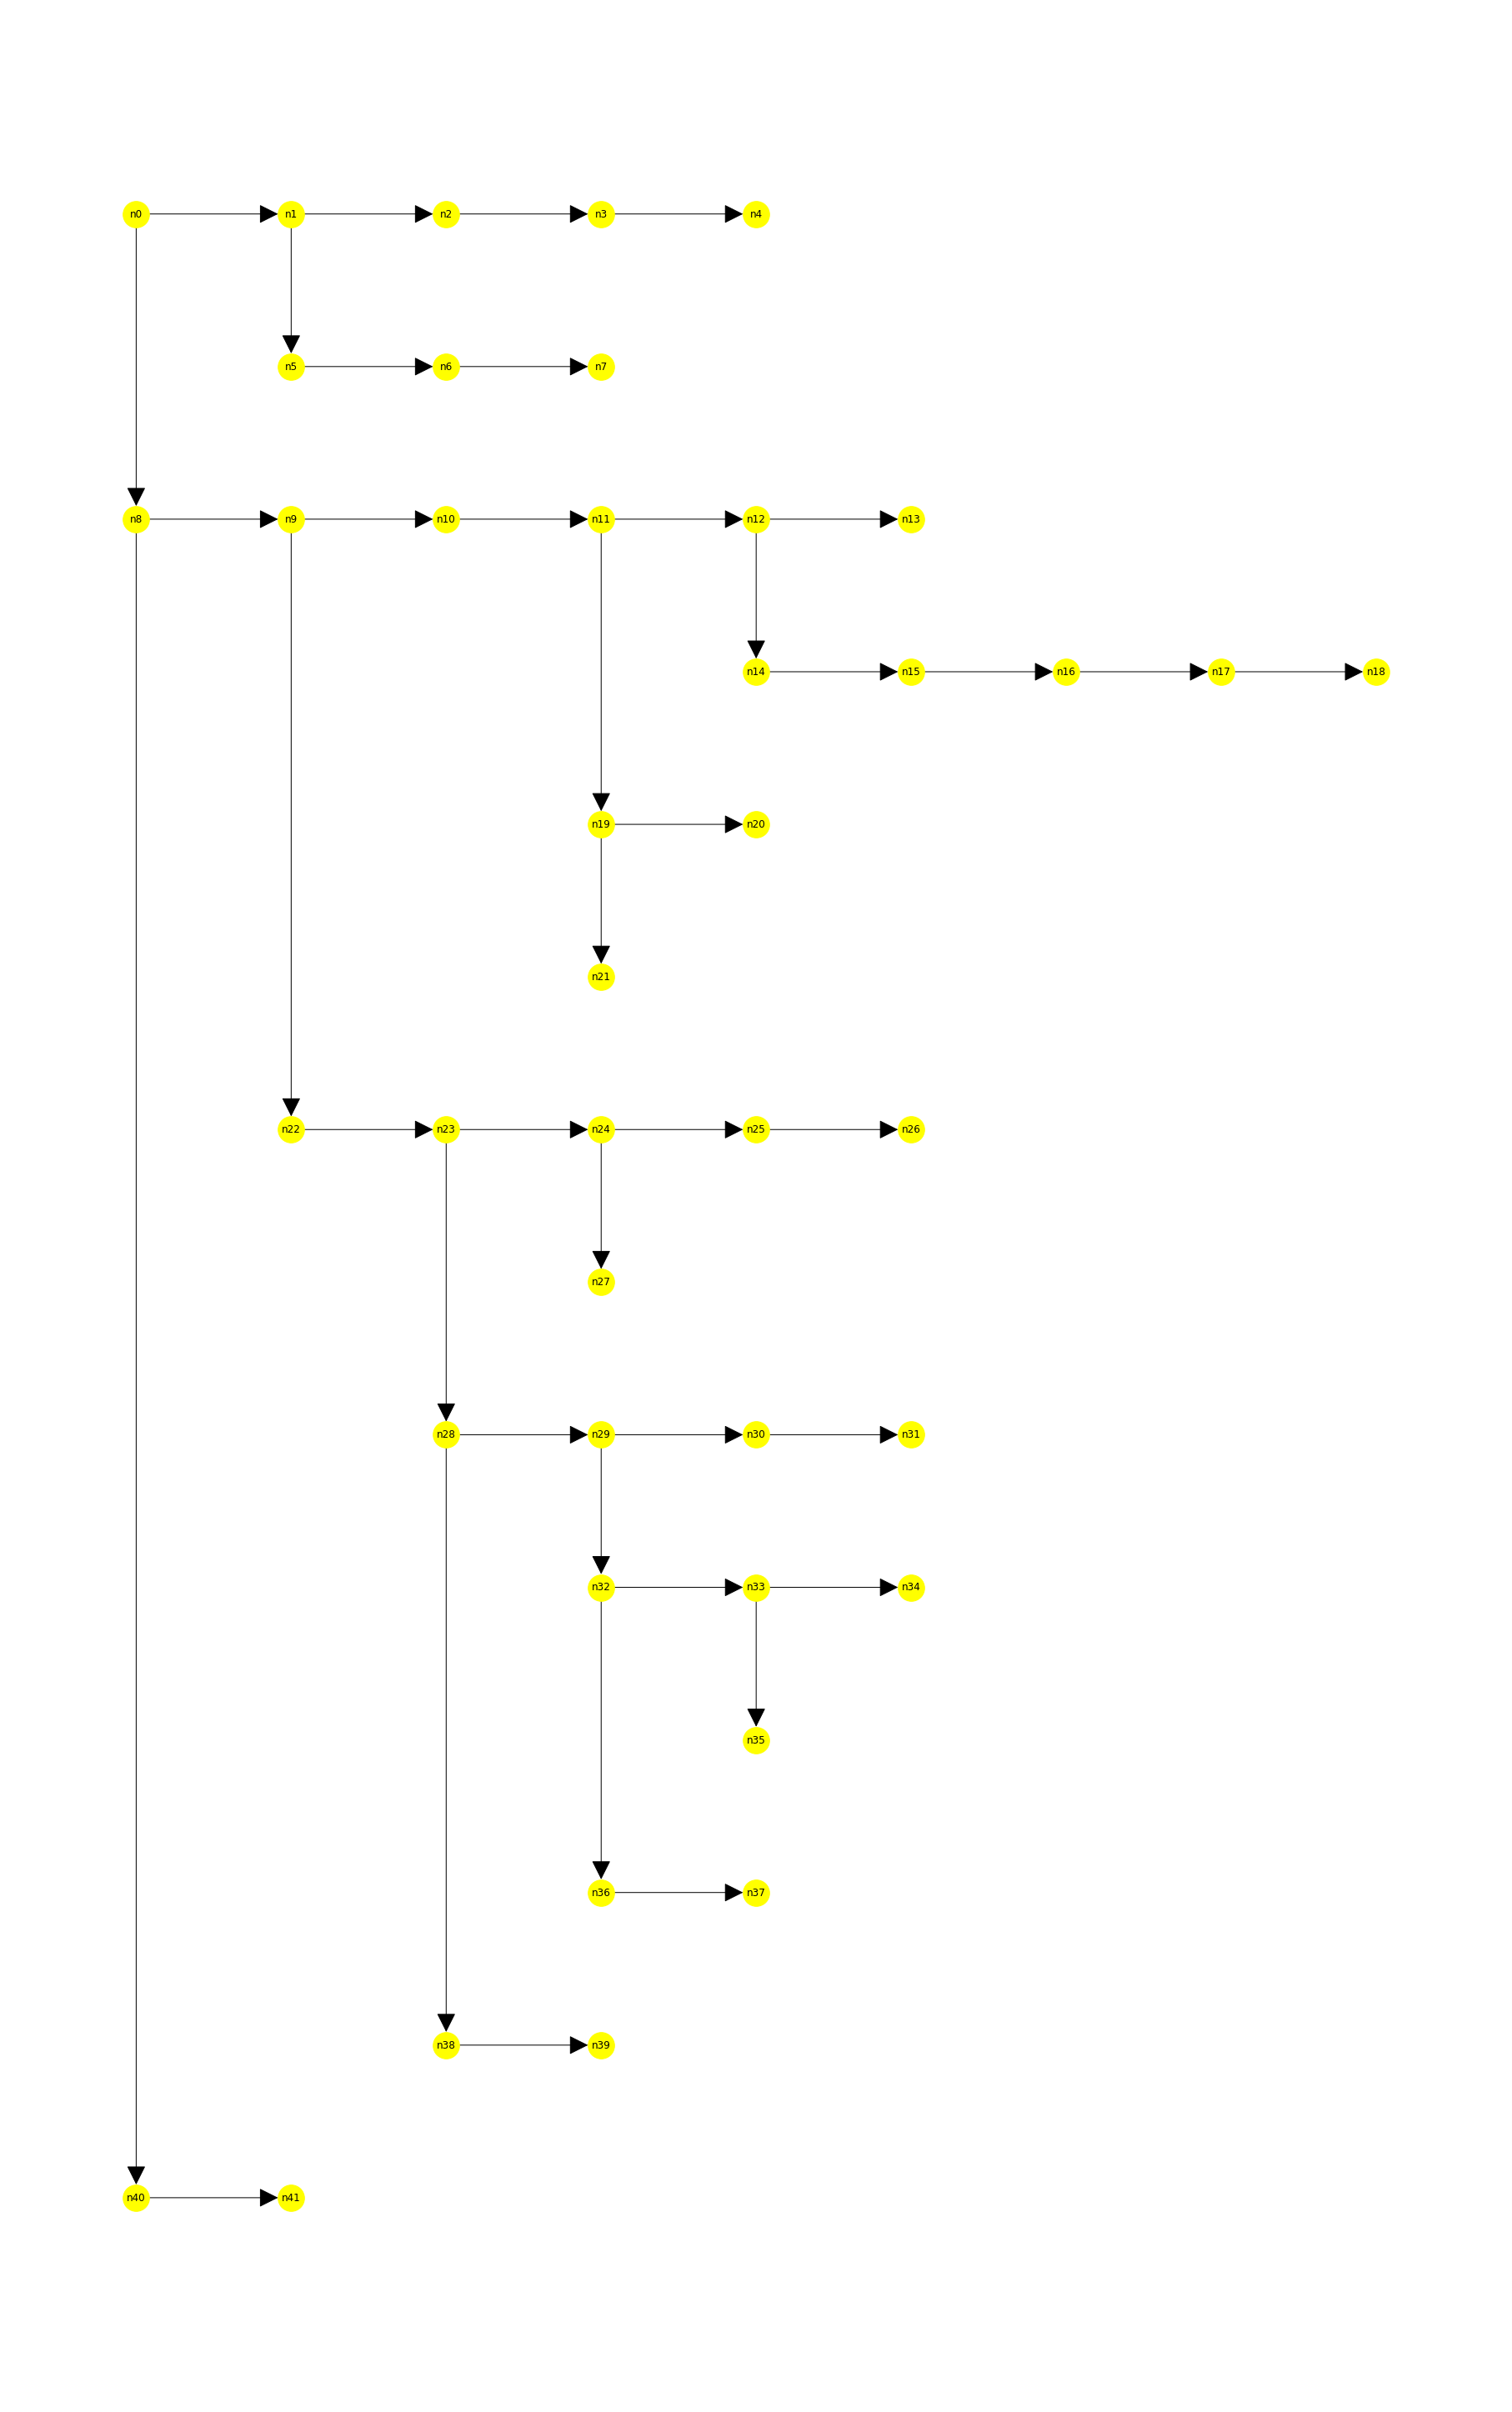

In [51]:
hv_tree = HVTree(bin_tree_xml)
hv_tree.draw()